In [3]:
import jieba
import wordcloud
import pandas as pd

In [4]:
df1 = pd.read_csv("block.csv")

In [5]:
df2 = pd.read_csv("Unblocked.csv")

In [14]:
txt = str(df1['微博正文'])
exclude = {'我们','的', '为', '和', '在', '是', '以', '新', '要', '好', '了', '我国','有', '向', '全', '同', '这个', '大', '最', '对', '到','就','吗','被','做','你','也','都','还是','会','但','那','这样','这','吧','看','觉得','但是','啥','所以','才','什么','导致','今天'}
w=wordcloud.WordCloud(font_path= 'SimHei.ttf', background_color='white', height = 480, width = 854, max_font_size=100, colormap='Reds',stopwords=exclude)   #此字体为微软雅黑字体
w.generate(" ".join(jieba.lcut(txt)))


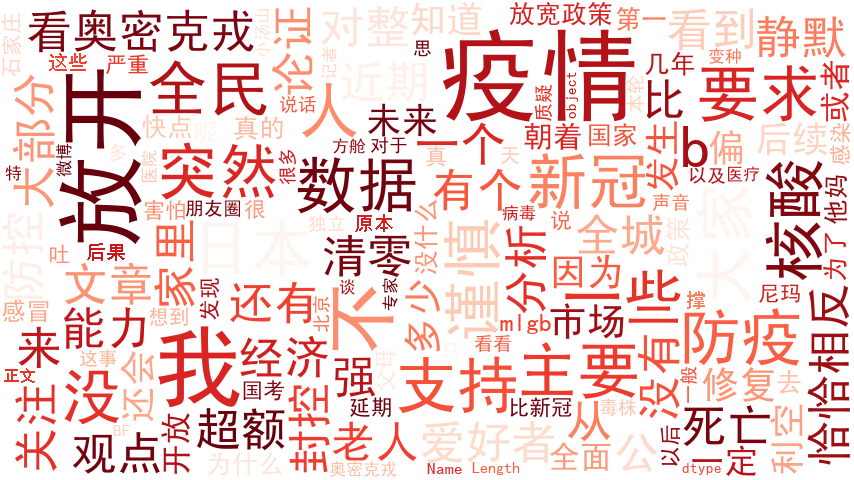

In [15]:
w.to_image()

In [18]:
txt2 = str(df2['微博正文'])
exclude = {'我们', '的', '为', '和', '在', '是', '以', '新', '要', '好', '了', '我国', '有', '向', '全', '同', '这个',
           '大', '最', '对', '到', '就', '吗', '被', '做', '你', '也', '都', '还是', '会', '但', '那', '这样', '这',
           '吧','我','大家','还有','所以','她','啊','真是','之后','关于'}
w = wordcloud.WordCloud(font_path='SimHei.ttf', background_color='white', height=480, width=854, max_font_size=100,
                        colormap='Reds', stopwords=exclude)  #此字体为微软雅黑字体
w.generate(" ".join(jieba.lcut(txt2)))



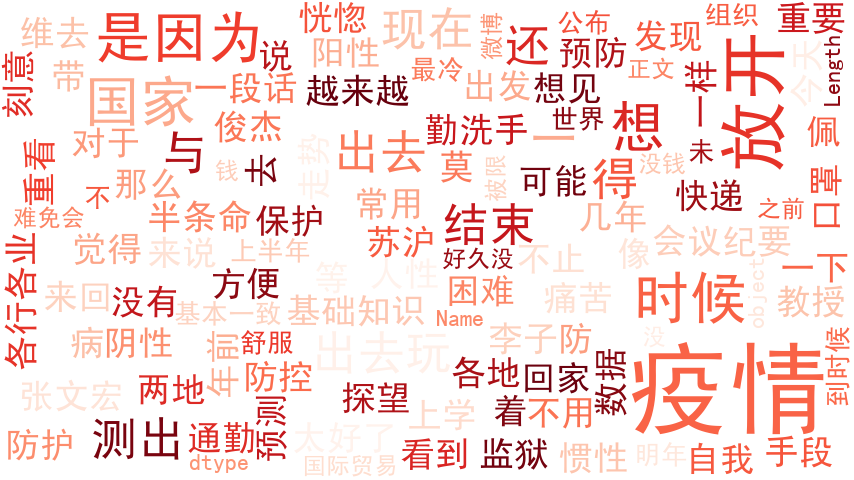

In [19]:
w.to_image()

In [65]:
segment = jieba.lcut(txt2)
words_df=pd.DataFrame({'segment':segment})

In [81]:
stopwords=pd.read_csv("cn_stopwords.txt",index_col=False,quoting=3,sep="\t",names=['stopword'])#quoting=3全不引用
words_df=words_df[~words_df.segment.isin(stopwords.stopword)]

In [83]:
import numpy

words_stat=words_df.groupby(by=['segment'])['segment'].count()

In [84]:
words_stat.sort_values(ascending = False)

segment
疫情      1844
放开      1709
#        715
没有       530
说        470
        ... 
拭目以待       1
拱          1
拴          1
拼争         1
🫠          1
Name: segment, Length: 14731, dtype: int64

In [79]:
words_stat.columns = ['count','a']

In [77]:
words_stat

segment
!       13
"        6
#      715
##     168
#&#      1
      ... 
🪵        1
🪷        1
🫑        1
🫘        2
🫠        1
Name: segment, Length: 15220, dtype: int64